# Perturb-seq data analysis

Notebook for analyzing zebrafish Perturb-seq data.

## Library imports

In [1]:
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
import mplscience
import seaborn as sns

import scanpy as sc
import scvelo as scv

from rgv_tools import DATA_DIR, FIG_DIR

/home/icb/weixu.wang/miniconda3/envs/regvelo_test/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/icb/weixu.wang/miniconda3/envs/regvelo_test/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/home/icb/weixu.wang/miniconda3/envs/regvelo_test/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/home/icb/weixu.wang/miniconda3/envs/regvelo_test/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/icb/weixu.wang/miniconda3/envs/regvelo_t

## General setting

In [2]:
plt.rcParams["svg.fonttype"] = "none"
sns.reset_defaults()
sns.reset_orig()
scv.settings.set_figure_params("scvelo", dpi_save=400, dpi=80, transparent=True, fontsize=14, color_map="viridis")

## Constants

In [3]:
DATASET = "zebrafish"

In [4]:
SAVE_FIGURES = True
if SAVE_FIGURES:
    (FIG_DIR / DATASET).mkdir(parents=True, exist_ok=True)

## Data loading

In [5]:
adata = sc.read_h5ad(DATA_DIR / DATASET / "raw" / "seu_NC_clustered_normalized.h5ad")
ss3 = sc.read_h5ad(DATA_DIR / DATASET / "processed" / "adata_preprocessed.h5ad")
metadata = pd.read_csv(DATA_DIR / DATASET / "raw" / "metadata.csv", index_col=0)

In [6]:
adata = adata[metadata.index.tolist()]

In [7]:
adata.obs = metadata

## Visualize via UMAP

In [8]:
# Using MELD to calculate sample-associated density estimates and relative likelihood
metadata = adata.obs
metadata["genotype_name"] = metadata["sgRNA_group"]
metadata["genotype"] = metadata["sgRNA_group"]
metadata["replicate"] = "A"
metadata

,orig.ident,nCount_RNA,nFeature_RNA,sample,percent.mt,RNA_snn_res.1,seurat_clusters,sgRNA_group,DoubletFinder,proj,RNA_snn_res.0.8,cell_anno,latent_time_imputed,latent_time_imputed_scvi,term_state_imputed,cell_anno_old,genotype_name,genotype,replicate
p1_AAACGGGAGCTAGTTC-1,SeuratProject,9374.373090,3125,p1,0.601578,14,14,fli1a_erf_erfl3,Singlet,perturbseq,6,mNC_head_mesenchymal,0.599100,0.567514,NaN,mNC_head_mesenchymal,fli1a_erf_erfl3,fli1a_erf_erfl3,A
p1_AAACGGGCAAAGAATC-1,SeuratProject,16617.288939,3908,p1,0.752648,2,2,fli1a_erf_erfl3,Singlet,perturbseq,9,Pigment_gch2_high,0.761031,0.783371,NaN,Pigment,fli1a_erf_erfl3,fli1a_erf_erfl3,A
p1_AAACGGGCAATGTAAG-1,SeuratProject,10564.695306,3262,p1,0.888390,17,17,mitfa_tfec_inhouse,Singlet,perturbseq,4,mNC_hox34,0.364584,0.289242,NaN,unclassified2,mitfa_tfec_inhouse,mitfa_tfec_inhouse,A
p1_AAACGGGCAGCAGTTT-1,SeuratProject,17754.127675,3934,p1,0.579913,19,19,fli1a_erf_erfl3,Singlet,perturbseq,7,mNC_arch2,0.236565,0.428227,NaN,mNC_arch2,fli1a_erf_erfl3,fli1a_erf_erfl3,A
p1_AAACGGGGTAGCGTAG-1,SeuratProject,15028.838200,3638,p1,0.467387,6,6,fli1a_erf_erfl3,Singlet,perturbseq,5,unclassified1,0.268428,0.410988,NaN,unclassified1,fli1a_erf_erfl3,fli1a_erf_erfl3,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p11_TTTGCGCAGAGTAATC-1,SeuratProject,6202.170676,2499,p11,0.776390,8,8,ebf3a,Singlet,perturbseq,0,mNC_vagal,0.387833,0.428689,NaN,Pigment_sox6_high_vagel,ebf3a,ebf3a,A
p11_TTTGGTTTCAACTCTT-1,SeuratProject,3644.718485,1857,p11,1.794744,5,5,elf1,Singlet,perturbseq,6,mNC_head_mesenchymal,0.538755,0.549123,NaN,mNC_head_mesenchymal,elf1,elf1,A
p11_TTTGGTTTCCTATTCA-1,SeuratProject,8422.826902,3344,p11,0.510019,25,25,nr2f2,Singlet,perturbseq,5,mNC_arch1,0.412674,0.363753,NaN,mNC_arch1,nr2f2,nr2f2,A
p11_TTTGGTTTCTAACTCT-1,SeuratProject,6612.583387,2661,p11,0.449287,6,6,ebf3a,Singlet,perturbseq,15,unclassified1,0.259958,0.374038,NaN,unclassified1,ebf3a,ebf3a,A


In [9]:
## Update pigment cell annotation
adata.obs["cell_anno_new"] = adata.obs["cell_anno"].copy()
adata.obs["cell_anno_new"][adata.obs["cell_anno_new"] == "Pigment_gch2_high"] = "Pigment"

In [10]:
perturbseq = adata[
    adata.obs["sgRNA_group"].isin(
        [
            "mitfa_tfec_inhouse",
            "negative",
            "control",
            "mitfa",
            "tfec",
            "tfec_mitfa_bhlhe40",
            "mitfa_tfec",
            "mitfa_tfec_tfeb",
            "elf1",
            "nr2f2",
            "nr2f5",
        ]
    )
].copy()

highlight_cell_types = [
    "mNC_hox34",
    "mNC_head_mesenchymal",
    "mNC_arch2",
    "Pigment",
    "Other",
]  # replace with your cell types of interest

# Create a new column for colors
perturbseq.obs["highlight"] = perturbseq.obs["cell_anno_new"].copy()
palette = dict(zip(ss3.obs["cell_type"].cat.categories, ss3.uns["cell_type_colors"]))
# Set cell types to grey if they are not in the highlight list
perturbseq.obs["highlight"] = perturbseq.obs["highlight"].apply(lambda x: x if x in highlight_cell_types else "Other")

# Create a color map where 'Other' is grey
colors = ["grey" if ct == "Other" else palette[ct] for i, ct in enumerate(highlight_cell_types)]
color_map = {ct: color for ct, color in zip(highlight_cell_types, colors)}
color_map["Other"] = "grey"

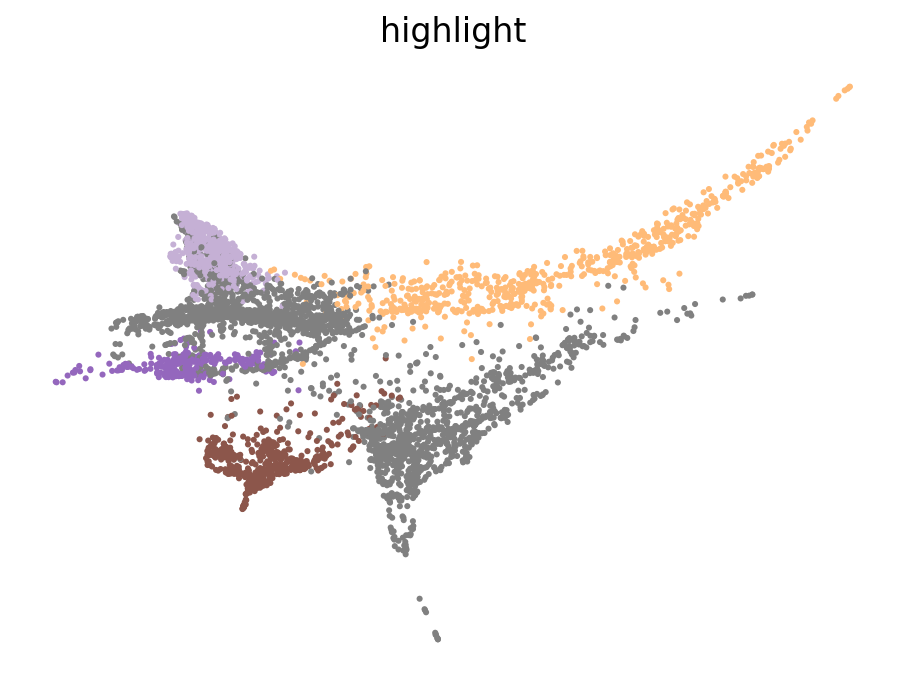

In [11]:
with mplscience.style_context():
    fig, ax = plt.subplots(figsize=(7, 5))
    sc.pl.embedding(
        perturbseq, color="highlight", basis="phate", legend_loc=None, palette=color_map, frameon=False, size=30, ax=ax
    )

    if SAVE_FIGURES:
        fig.savefig(FIG_DIR / DATASET / "INTRO_figure_perturb.svg", format="svg", transparent=True, bbox_inches="tight")
    plt.show()

## Visualize nr2f2, tfec, mitfa and elf1 perturbation effect

In [12]:
sgRNA_groups = ["nr2f2", "tfec", "mitfa", "elf1"]

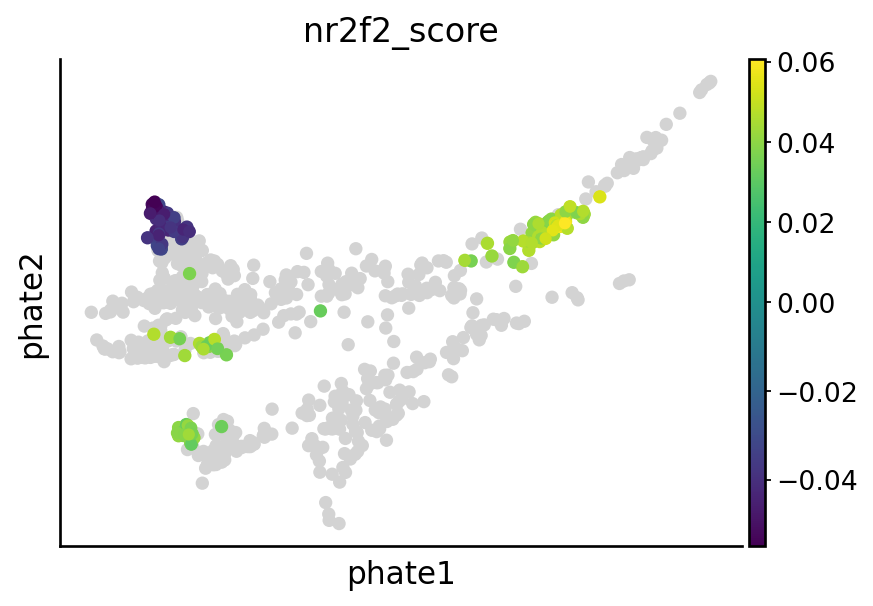

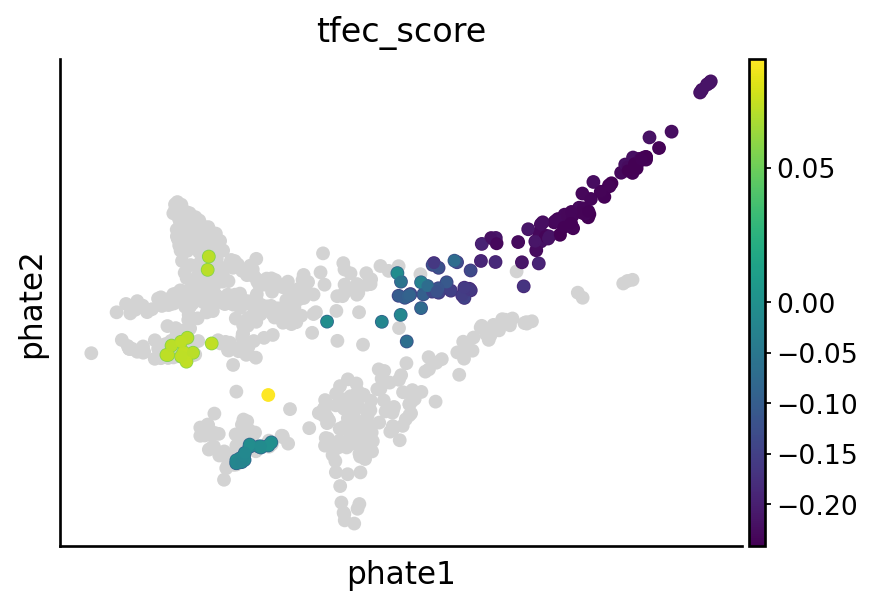

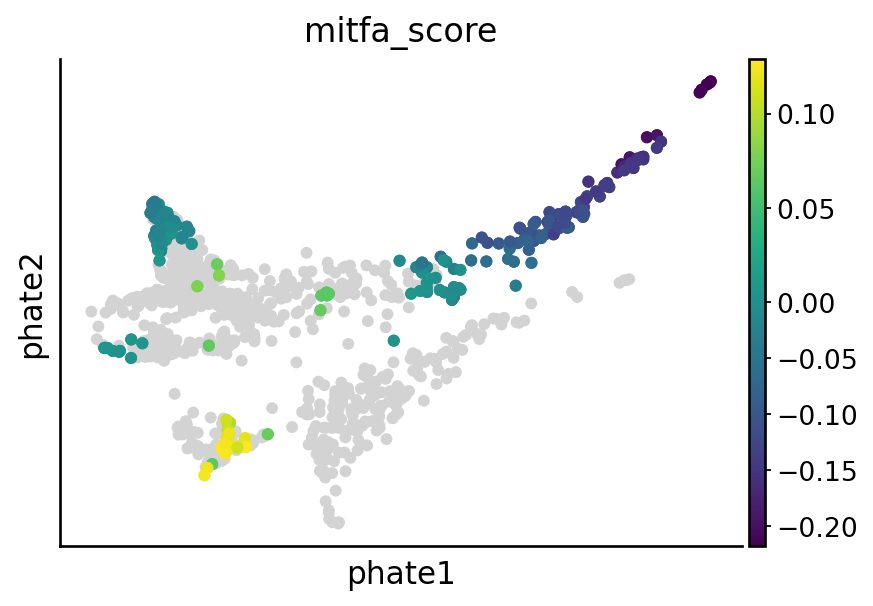

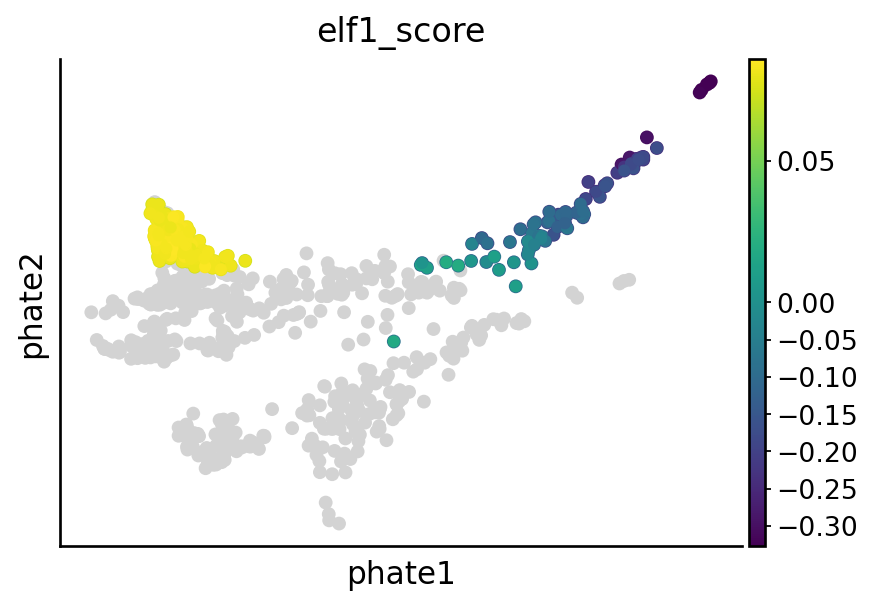

In [13]:
# Visualize the perturbation on terminal states
cell_types = [
    "mNC_hox34",
    "mNC_head_mesenchymal",
    "mNC_arch2",
    "Pigment",
]

for group in sgRNA_groups:
    sample_likelihoods = pd.read_csv(DATA_DIR / DATASET / "raw" / f"likelihood_{group}.csv", index_col=0)
    condition = (metadata["sgRNA_group"] == "control") | (metadata["sgRNA_group"] == group)
    experimental_samples = [f"{group}A", f"{group}B"]

    df = pd.DataFrame(sample_likelihoods[experimental_samples])
    df[group] = df.mean(1)
    # Calculate the percentiles values

    down = df[group].quantile(0.2)
    up = df[group].quantile(0.8)

    # Apply the condition to set values outside the 5th and 95th percentiles to NaN
    df["quantile_value"] = np.where((df[group] > up) | (df[group] < down), df[group], np.nan)
    df["quantile_value"] = df["quantile_value"] - np.mean(df[group])

    vec = adata[condition].obs["cell_anno_new"].apply(lambda x: 1 if x in cell_types else np.nan)
    df["quantile_value"] = np.array(df["quantile_value"]) * np.array(vec)

    adata_sub = adata[condition].copy()
    adata_sub.obs[f"{group}_score"] = np.array(df["quantile_value"]).copy()

    ## Plot the figure
    overall_score = pd.DataFrame({"score": np.array([np.nan] * adata_sub.shape[0])})
    overall_score.index = adata_sub.obs.index.tolist()
    overall_score.loc[adata_sub.obs.index.tolist(), "score"] = np.array(adata_sub.obs[f"{group}_score"])

    adata_sub.obs[f"{group}_score"] = np.array(overall_score["score"])
    adata_sub.obs["highlight"] = (~np.isnan(adata_sub.obs[f"{group}_score"])).astype(str)

    highlighted_points = adata_sub[adata_sub.obs["highlight"] == "True"]
    x_highlight = highlighted_points.obsm["X_phate"][:, 0]
    y_highlight = highlighted_points.obsm["X_phate"][:, 1]
    color_values = highlighted_points.obs[f"{group}_score"]  # Adjust to your continuous variable

    with mplscience.style_context():  # Use the mplscience style context
        fig, ax = plt.subplots(figsize=(6, 4))

        sc.pl.embedding(adata_sub, basis="phate", color=f"{group}_score", vcenter=0, show=False, ax=ax)
        plt.scatter(
            x_highlight,
            y_highlight,
            c=color_values,
            cmap="viridis",  # Choose a gradient color map, e.g., 'viridis', 'plasma', 'inferno', etc.
            s=20,  # Larger size for highlighted points
            # edgecolor='black',  # Optional: border for emphasis
        )

        if SAVE_FIGURES:
            fig.savefig(
                FIG_DIR / DATASET / f"{group}_perturbation.svg", format="svg", transparent=True, bbox_inches="tight"
            )
        plt.show()

## Visualize differential expressed genes in tfec perturbation panel

In [14]:
perturbseq = adata.copy()
perturbseq = perturbseq[
    ~perturbseq.obs["cell_anno_new"].isin(["unclassified2", "unclassified1", "Mutant_hox23", "Mutant"]),
]
seu_small = perturbseq[perturbseq.obs["sgRNA_group"].isin(["control", "tfec"]),]
genotype = seu_small.obs["sgRNA_group"].tolist()

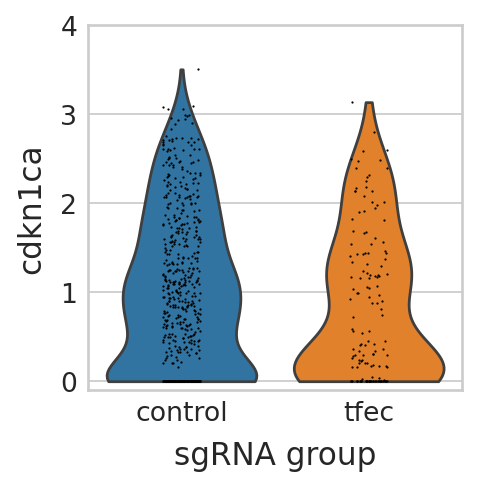

In [15]:
with mplscience.style_context():  # Use the mplscience style context
    sns.set_style(style="whitegrid")
    fig, ax = plt.subplots(figsize=(3, 3))

    # Create the scatter plot
    sc.pl.violin(seu_small, ["cdkn1ca"], multi_panel=False, groupby="sgRNA_group", stripplot=True, ax=ax, show=False)
    ax.set_ylim(bottom=-0.1, top=4)

    if SAVE_FIGURES:
        fig.savefig(FIG_DIR / DATASET / "cdkn1ca.svg", format="svg", transparent=True, bbox_inches="tight")

    # Display the plot
    plt.show()

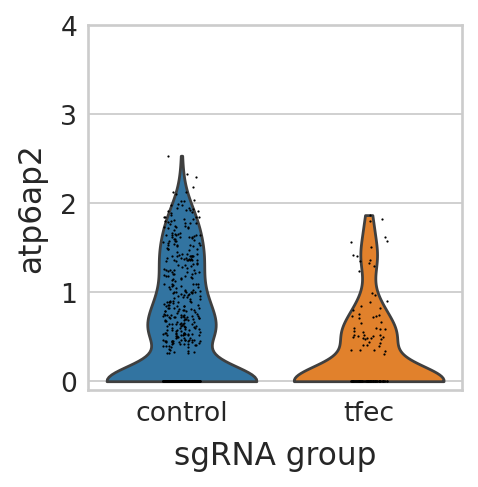

In [16]:
with mplscience.style_context():  # Use the mplscience style context
    sns.set_style(style="whitegrid")
    fig, ax = plt.subplots(figsize=(3, 3))

    # Create the scatter plot
    sc.pl.violin(seu_small, ["atp6ap2"], multi_panel=False, groupby="sgRNA_group", stripplot=True, ax=ax, show=False)
    ax.set_ylim(bottom=-0.1, top=4)

    if SAVE_FIGURES:
        fig.savefig(FIG_DIR / DATASET / "atp6ap2.svg", format="svg", transparent=True, bbox_inches="tight")

    # Display the plot
    plt.show()

### test significance

In [17]:
scipy.stats.ttest_ind(
    seu_small[np.array(genotype) == "tfec", "cdkn1ca"].X.toarray().reshape(-1),
    seu_small[np.array(genotype) != "tfec", "cdkn1ca"].X.toarray().reshape(-1),
    equal_var=False,
    alternative="less",
)

TtestResult(statistic=-2.0416193271649687, pvalue=0.021191380003823368, df=219.9875671451483)

In [18]:
scipy.stats.ttest_ind(
    seu_small[np.array(genotype) == "tfec", "atp6ap2"].X.toarray().reshape(-1),
    seu_small[np.array(genotype) != "tfec", "atp6ap2"].X.toarray().reshape(-1),
    equal_var=False,
    alternative="less",
)

TtestResult(statistic=-5.547499181077916, pvalue=3.4438545499844835e-08, df=270.9981680245929)

## Visualize differential expressed genes in elf1 perturbation panel

In [19]:
perturbseq = adata.copy()
perturbseq = perturbseq[
    ~perturbseq.obs["cell_anno_new"].isin(["unclassified2", "unclassified1", "Mutant_hox23", "Mutant"]),
]
seu_small = perturbseq[perturbseq.obs["sgRNA_group"].isin(["control", "elf1"]),]
genotype = seu_small.obs["sgRNA_group"].tolist()

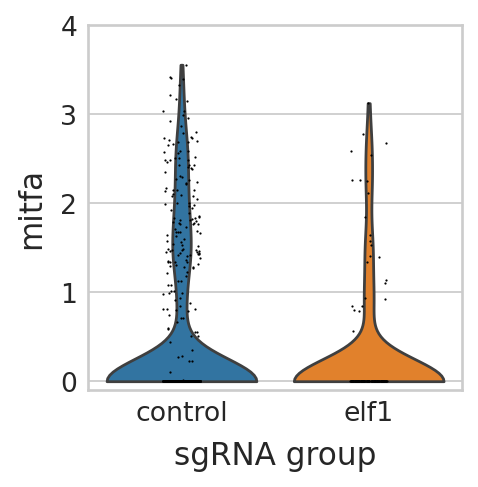

In [20]:
with mplscience.style_context():  # Use the mplscience style context
    sns.set_style(style="whitegrid")
    fig, ax = plt.subplots(figsize=(3, 3))

    # Create the scatter plot
    sc.pl.violin(seu_small, ["mitfa"], multi_panel=False, groupby="sgRNA_group", stripplot=True, ax=ax, show=False)
    ax.set_ylim(bottom=-0.1, top=4)

    if SAVE_FIGURES:
        fig.savefig(
            FIG_DIR / DATASET / "mitfa_expression_elf1_knockout.svg",
            format="svg",
            transparent=True,
            bbox_inches="tight",
        )

    # Display the plot
    plt.show()

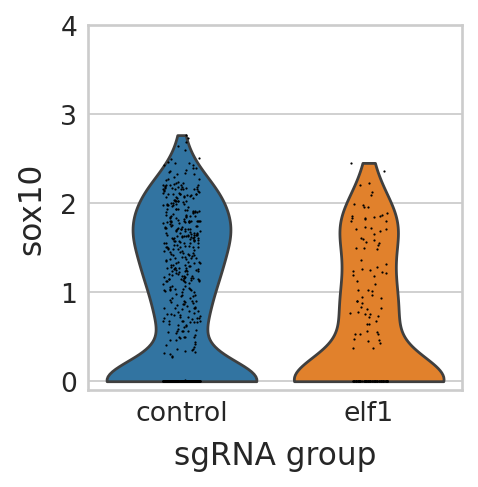

In [21]:
with mplscience.style_context():  # Use the mplscience style context
    sns.set_style(style="whitegrid")
    fig, ax = plt.subplots(figsize=(3, 3))

    # Create the scatter plot
    sc.pl.violin(seu_small, ["sox10"], multi_panel=False, groupby="sgRNA_group", stripplot=True, ax=ax, show=False)
    ax.set_ylim(bottom=-0.1, top=4)

    if SAVE_FIGURES:
        fig.savefig(
            FIG_DIR / DATASET / "sox10_expression_elf1_knockout.svg",
            format="svg",
            transparent=True,
            bbox_inches="tight",
        )

    # Display the plot
    plt.show()

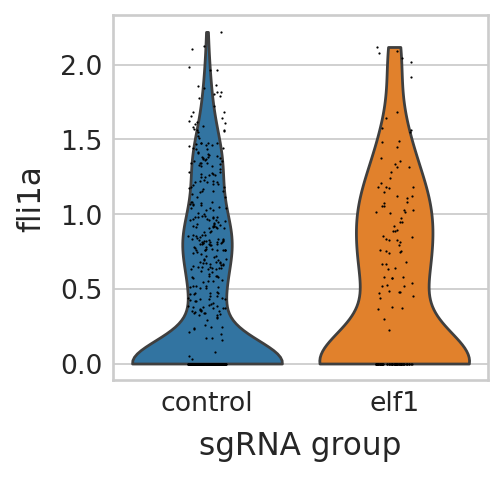

In [22]:
with mplscience.style_context():  # Use the mplscience style context
    sns.set_style(style="whitegrid")
    fig, ax = plt.subplots(figsize=(3, 3))

    # Create the scatter plot
    sc.pl.violin(seu_small, ["fli1a"], multi_panel=False, groupby="sgRNA_group", stripplot=True, ax=ax, show=False)

    if SAVE_FIGURES:
        fig.savefig(
            FIG_DIR / DATASET / "fli1a_expression_elf1_knockout.svg",
            format="svg",
            transparent=True,
            bbox_inches="tight",
        )

    # Display the plot
    plt.show()

### test significance

In [23]:
scipy.stats.ttest_ind(
    seu_small[np.array(genotype) == "elf1", "mitfa"].X.toarray().reshape(-1),
    seu_small[np.array(genotype) != "elf1", "mitfa"].X.toarray().reshape(-1),
    equal_var=False,
    alternative="less",
)

TtestResult(statistic=-3.429003795549063, pvalue=0.0003452279743702678, df=300.522449116822)

In [24]:
scipy.stats.ttest_ind(
    seu_small[np.array(genotype) == "elf1", "sox10"].X.toarray().reshape(-1),
    seu_small[np.array(genotype) != "elf1", "sox10"].X.toarray().reshape(-1),
    equal_var=False,
    alternative="less",
)

TtestResult(statistic=-4.108995730134873, pvalue=2.6789127768845648e-05, df=255.2575590451451)

In [25]:
scipy.stats.ttest_ind(
    seu_small[np.array(genotype) == "elf1", "fli1a"].X.toarray().reshape(-1),
    seu_small[np.array(genotype) != "elf1", "fli1a"].X.toarray().reshape(-1),
    equal_var=False,
    alternative="greater",
)

TtestResult(statistic=1.3860128076275413, pvalue=0.0835617324921002, df=223.63128948496157)

## Visualize differential expressed genes in pigment cell lineage of elf1 perturbation panel

In [26]:
perturbseq = adata.copy()
perturbseq = perturbseq[perturbseq.obs["cell_anno_new"].isin(["Pigment"]),]
seu_small = perturbseq[perturbseq.obs["sgRNA_group"].isin(["control", "elf1"]),]
genotype = seu_small.obs["sgRNA_group"].tolist()

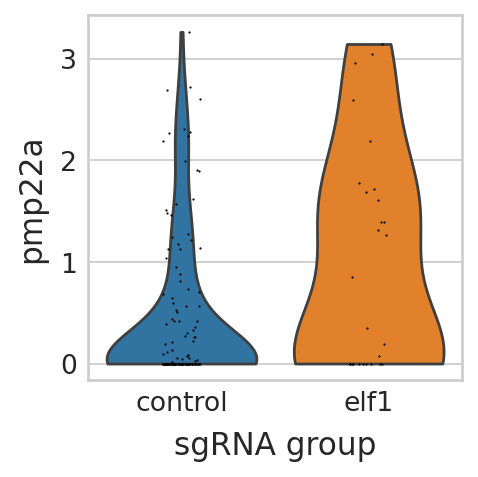

In [27]:
with mplscience.style_context():  # Use the mplscience style context
    sns.set_style(style="whitegrid")
    fig, ax = plt.subplots(figsize=(3, 3))

    # Create the scatter plot
    sc.pl.violin(seu_small, ["pmp22a"], multi_panel=False, groupby="sgRNA_group", stripplot=True, ax=ax, show=False)

    if SAVE_FIGURES:
        fig.savefig(
            FIG_DIR / DATASET / "pmp22a_expression_elf1_knockout.svg",
            format="svg",
            transparent=True,
            bbox_inches="tight",
        )

    # Display the plot
    plt.show()

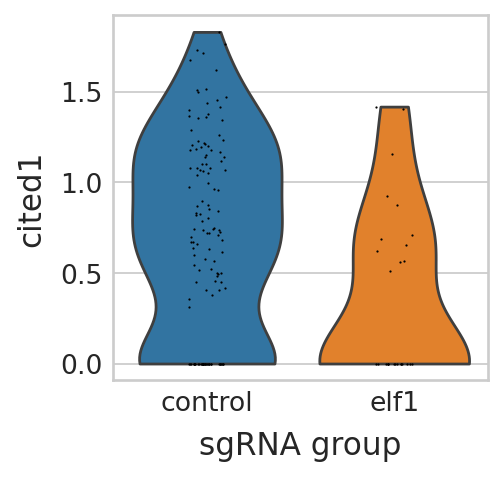

In [28]:
with mplscience.style_context():  # Use the mplscience style context
    sns.set_style(style="whitegrid")
    fig, ax = plt.subplots(figsize=(3, 3))

    # Create the scatter plot
    sc.pl.violin(seu_small, ["cited1"], multi_panel=False, groupby="sgRNA_group", stripplot=True, ax=ax, show=False)

    if SAVE_FIGURES:
        fig.savefig(
            FIG_DIR / DATASET / "cited1_expression_elf1_knockout.svg",
            format="svg",
            transparent=True,
            bbox_inches="tight",
        )

    # Display the plot
    plt.show()

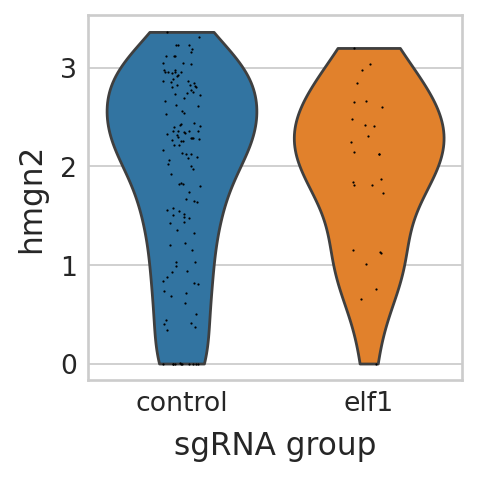

In [29]:
with mplscience.style_context():  # Use the mplscience style context
    sns.set_style(style="whitegrid")
    fig, ax = plt.subplots(figsize=(3, 3))

    # Create the scatter plot
    sc.pl.violin(seu_small, ["hmgn2"], multi_panel=False, groupby="sgRNA_group", stripplot=True, ax=ax, show=False)

    if SAVE_FIGURES:
        fig.savefig(
            FIG_DIR / DATASET / "hmgn2_expression_elf1_knockout.svg",
            format="svg",
            transparent=True,
            bbox_inches="tight",
        )

    # Display the plot
    plt.show()

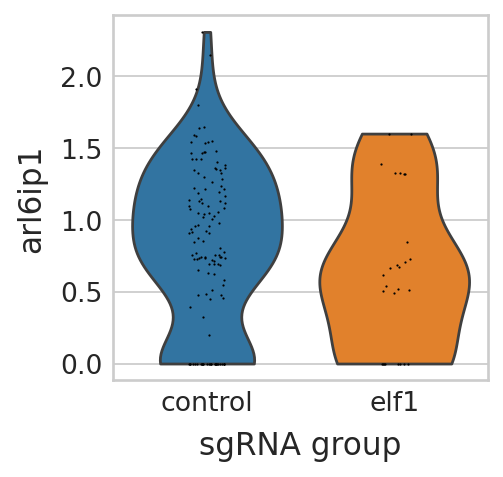

In [30]:
with mplscience.style_context():  # Use the mplscience style context
    sns.set_style(style="whitegrid")
    fig, ax = plt.subplots(figsize=(3, 3))

    # Create the scatter plot
    sc.pl.violin(seu_small, ["arl6ip1"], multi_panel=False, groupby="sgRNA_group", stripplot=True, ax=ax, show=False)

    if SAVE_FIGURES:
        fig.savefig(
            FIG_DIR / DATASET / "arl6ip1_expression_elf1_knockout.svg",
            format="svg",
            transparent=True,
            bbox_inches="tight",
        )

    # Display the plot
    plt.show()

## Visualize elf1 gene expression change when knockout tfec and fli1a

### knockout tfec

In [31]:
perturbseq = adata.copy()
perturbseq = perturbseq[
    ~perturbseq.obs["cell_anno_new"].isin(["unclassified2", "unclassified1", "Mutant_hox23", "Mutant"]),
]
seu_small = perturbseq[perturbseq.obs["sgRNA_group"].isin(["control", "tfec"]),]
genotype = seu_small.obs["sgRNA_group"].tolist()

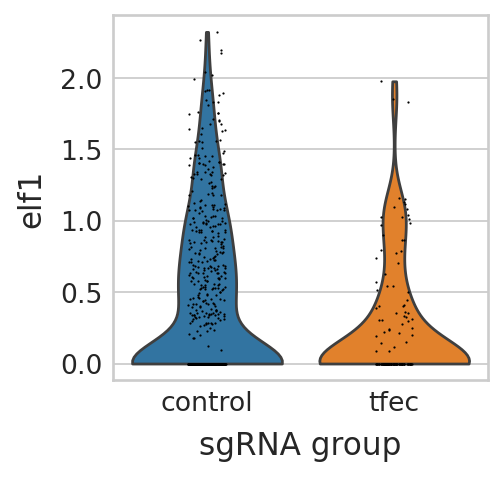

In [32]:
with mplscience.style_context():  # Use the mplscience style context
    sns.set_style(style="whitegrid")
    fig, ax = plt.subplots(figsize=(3, 3))

    # Create the scatter plot
    sc.pl.violin(seu_small, ["elf1"], multi_panel=False, groupby="sgRNA_group", stripplot=True, ax=ax, show=False)

    if SAVE_FIGURES:
        fig.savefig(
            FIG_DIR / DATASET / "elf1_expression_tfec_knockout.svg", format="svg", transparent=True, bbox_inches="tight"
        )

    # Display the plot
    plt.show()

### test significance

In [33]:
scipy.stats.ttest_ind(
    seu_small[np.array(genotype) == "tfec", "elf1"].X.toarray().reshape(-1),
    seu_small[np.array(genotype) != "tfec", "elf1"].X.toarray().reshape(-1),
    equal_var=False,
    alternative="less",
)

TtestResult(statistic=-5.366020270431321, pvalue=8.610173685738961e-08, df=272.49193453818)

### knockout fli1a

In [34]:
perturbseq = adata.copy()
perturbseq = perturbseq[
    ~perturbseq.obs["cell_anno_new"].isin(["unclassified2", "unclassified1", "Mutant_hox23", "Mutant"]),
]
seu_small = perturbseq[perturbseq.obs["sgRNA_group"].isin(["control", "fli1a"]),]
genotype = seu_small.obs["sgRNA_group"].tolist()

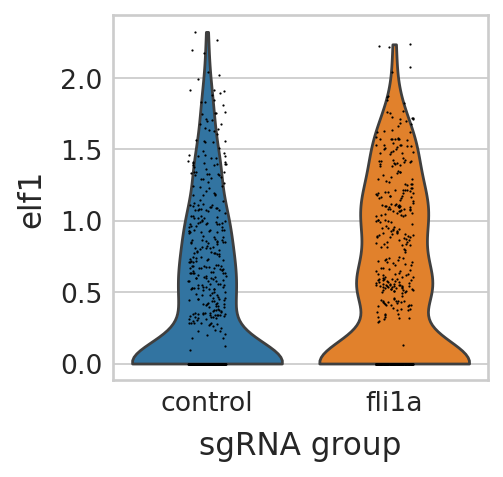

In [35]:
with mplscience.style_context():  # Use the mplscience style context
    sns.set_style(style="whitegrid")
    fig, ax = plt.subplots(figsize=(3, 3))

    # Create the scatter plot
    sc.pl.violin(seu_small, ["elf1"], multi_panel=False, groupby="sgRNA_group", stripplot=True, ax=ax, show=False)

    if SAVE_FIGURES:
        fig.savefig(
            FIG_DIR / DATASET / "elf1_expression_fli1a_knockout.svg",
            format="svg",
            transparent=True,
            bbox_inches="tight",
        )

    # Display the plot
    plt.show()

## test significance

In [36]:
scipy.stats.ttest_ind(
    seu_small[np.array(genotype) == "fli1a", "elf1"].X.toarray().reshape(-1),
    seu_small[np.array(genotype) != "fli1a", "elf1"].X.toarray().reshape(-1),
    equal_var=False,
    alternative="greater",
)

TtestResult(statistic=3.059975496268048, pvalue=0.0011362106276185085, df=1002.4934192631699)